<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/DNN_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Neural Network Model 2**

In [1]:
import torch
import math
import numpy as np
import matplotlib as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


In [2]:
X=torch.linspace(0,3,300)
Y=torch.sin(5*math.pi*X)
target=Y[:]

I have Included 3 hidden layers here to make Neural network as Deep Neural Netowrk.

In [8]:
class Fun4(nn.Module):
  def __init__(self,X):
    super(Fun4,self).__init__()
    self.fc1=nn.Linear(300,50)
    self.fc2=nn.Linear(50,45)
    self.fc3=nn.Linear(45,50)
    self.fc4=nn.Linear(50,90)
    self.fc5=nn.Linear(90,300)

  def forward(self,X):
    out=self.fc1(X)
    out=F.relu(self.fc2(out))
    out=F.relu(self.fc3(out))
    out=F.relu(self.fc4(out))
    out=self.fc5(out)
    return out
    
model=Fun4(X)

print(model)

Fun4(
  (fc1): Linear(in_features=300, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=45, bias=True)
  (fc3): Linear(in_features=45, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=90, bias=True)
  (fc5): Linear(in_features=90, out_features=300, bias=True)
)


The Total number of trainable parameters are 51,535

In [9]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)

51535


Let us Train the model and visualise the loss for the DNN model 2

In [10]:
criterion=nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_list=[]
final=torch.tensor(0)
Epochs=10
for epoch in range(Epochs):
  running_loss=0.0
  for i in range(300):
    optimizer.zero_grad()
    outputs=model(X)
    loss=criterion(outputs,target)
    running_loss+=loss.item()
    loss_list.append(running_loss)
    loss.backward()
    optimizer.step()
  print('[%d, %5d] loss: %.8f' %(epoch + 1, i, running_loss ))
  final=(outputs.flatten())


[1,   299] loss: 5.36692527
[2,   299] loss: 0.00000000
[3,   299] loss: 0.00000000
[4,   299] loss: 0.00512852
[5,   299] loss: 0.00355921
[6,   299] loss: 0.00398528
[7,   299] loss: 0.00003777
[8,   299] loss: 0.00454821
[9,   299] loss: 0.00397214
[10,   299] loss: 0.01366276


Text(0.5, 1.0, 'ModelLoss4')

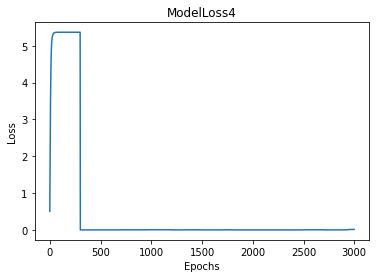

In [11]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ModelLoss4')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 300, 50]          15,050
            Linear-2              [-1, 300, 45]           2,295
            Linear-3              [-1, 300, 50]           2,300
            Linear-4              [-1, 300, 90]           4,590
            Linear-5             [-1, 300, 300]          27,300
Total params: 51,535
Trainable params: 51,535
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.34
Forward/backward pass size (MB): 1.22
Params size (MB): 0.20
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


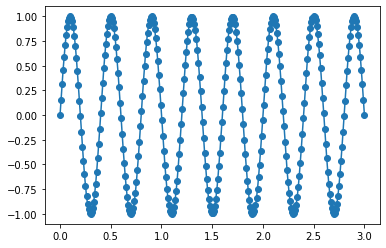

In [15]:
plt.scatter(X,Y)
graph2=final
final_model=graph2.detach()
plt.plot(X,final_model)
summary(model,(300,300))